## What is the expected forecast for Dec closure? Feel free to use time series or any predictive technique to determine the same. You may take the help of R as well. In case legacy data is needed, please feel free to make assumptions

For forecasting the December closure at Giva, a jewelry brand, I utilized Python and applied a time series forecasting model to predict future sales trends, taking into account both seasonality and external factors that influence the jewelry market.

I chose OrderComp as the closure metric, representing the key variable we are forecasting. This metric encapsulates the overall sales performance, and it is essential to understand how different factors, particularly seasonal and market-based events, influence these trends.

Forecasting Approach:

Stationarity Check: To ensure the data was suitable for time series modeling, I first checked for stationarity using the ADF test. The data was found to be stationary, making it ideal for modeling with techniques like ARIMA.

Modeling with Prophet: After evaluating the ARIMA model and finding it did not deliver satisfactory results, I transitioned to using the Prophet model. Prophet is particularly suited for this type of data as it effectively captures seasonality, holidays, and special events, all of which are highly relevant for a jewelry brand like Giva.
Prophet's Advantage: Given that festive seasons and wedding periods bring in large, sometimes unexpected, sales volumes, Prophet allows us to model these events more effectively.

The dataset contains key columns such as trend, yhat_lower, yhat_upper, and weekly components, all of which are used to predict the OrderComp (closure metric).
yhat represents the forecasted values, which, in this case, represent the expected sales for each day. For example:
On December 27th, the forecasted sales value (yhat) is 631.34.
On December 28th, the forecasted sales value (yhat) is 684.03, showing an increase. Additionally, the yhat_upper and yhat_lower intervals suggest a range of sales values, providing a degree of confidence in the forecast.

#### You can refer to my second shared file, where I have applied the Prophet model to the historical sales data to generate the forecast for December.



## An org leader feels that your conversion rates are dropping, what could be your response to the same? 

1. Acknowledge the Concern and Show Understanding.

2. Assess the Data: To get to the root cause, we can start by analyzing the conversion rate trends over the past few months. We would need to examine whether the drop is consistent across different segments, such as by customer demographics, acquisition channels, or even geographic location. This could help us identify if the issue is widespread or specific to certain areas.

3. Investigate Possible Causes: Here are a few potential areas we could look into:
Lead Quality: Are we attracting leads that are less likely to convert?
Changes in the Funnel: Have there been any changes to our marketing or sales funnel that could impact conversion? For example, if there’s a recent adjustment in the user journey, checkout process, or pricing, it might be creating friction.
External Factors: Sometimes, external factors like market trends, competition, or even seasonal changes can affect conversion rates. We should also assess whether there are any industry-wide shifts that could be influencing customer behavior.
User Experience: Has there been any recent updates to our website or product interface that might have impacted user experience? Conversion rates are often linked to ease of use and a smooth experience across devices.
Messaging/Content: Are our value propositions, marketing messages, or calls to action still resonating with our target audience? If there’s a disconnect, it might impact conversions.

4. Analyze Customer Behavior: We could also look at customer behavior metrics like bounce rate, time on site, and exit rates to see where potential drop-offs are happening. Heatmaps or user session recordings can help pinpoint specific friction points where customers might be abandoning the process.

5. Run Experiments or A/B Tests: To validate potential solutions, we could experiment with A/B testing different approaches, such as adjusting our marketing campaigns, tweaking the sales funnel, or improving the user interface. These tests can provide data-driven insights to determine which changes lead to improved conversions.

6. Monitor & Optimize: Once we identify the underlying issue, we can make data-driven changes and closely monitor the conversion rate to ensure it improves. It’s also important to continually optimize the process to keep conversion rates high and ensure we’re adapting to changing market conditions.

## Do you see any discrepency in the data? How would you clean up the same?

Unnamed Column: The dataset initially contained an unnamed column which seemed unnecessary. I dropped this column during the data cleaning process as it did not contribute to the analysis or the model’s prediction.

Column Header Formatting: The column headers were not in the correct format, as the first row was mistakenly used as data rather than headers. To resolve this, I moved the column names from the first row and set them as the actual column headers. This ensured that the dataset had a proper header format, making it easier to work with during analysis and modeling.

Date Index: The date column was initially part of the data and not set as the index. I corrected this by changing the index to the date column, as this provided better organization and allowed me to perform time-series forecasting more effectively.



# What insights can you draw from here?

Insights from the Model and "Add to Cart" Graph:
Upward Trend:
The model reveals a consistent upward trend in the data, indicating that the metric being analyzed is steadily growing over time. This is a positive indicator of growth, whether it pertains to customer engagement, sales, or other factors. It suggests that strategies for driving more engagement and conversions are working or that market conditions are favorable.

Uniform Seasonality:
The model also highlights uniform seasonality, meaning there are recurring patterns at specific intervals. This could correspond to predictable fluctuations in sales, customer behavior, or other seasonal factors. By understanding these seasonal peaks, businesses can plan targeted marketing campaigns, promotions, or product launches during key times to maximize impact.

Outliers in Residuals:
The presence of outliers in the residuals suggests that there are irregular fluctuations or anomalies in the data that cannot be captured by the model’s overall trend or seasonal patterns. These outliers could represent special events, sudden changes in customer behavior (e.g., flash sales,festivals,marriage), or other external factors. Identifying and understanding these outliers could help businesses take more informed actions to leverage unexpected spikes or address issues.

Focus on "Add to Cart" Column:When customers add products to their cart, they are showing a high level of intent to purchase. This behavior indicates that they are seriously considering the items, and often, they are only a few steps away from completing the purchase. Focusing on this segment can lead to higher conversion rates, as these customers are more likely to buy compared to casual browsers.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('Excel Sample_BA _GIVA (1).xlsx',sheet_name='App Data',header=1)

In [5]:
#Remove the unnamed index column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2021-09-01 to 2021-12-21
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   New Installs           112 non-null    int64  
 1   Returning Users        112 non-null    int64  
 2   Uninstalls             112 non-null    int64  
 3   Net new installs       112 non-null    int64  
 4   Uninstall rate         112 non-null    float64
 5   DAU                    112 non-null    int64  
 6   Unique Page Views      112 non-null    int64  
 7   Page view conversion   112 non-null    float64
 8   Add to Cart            112 non-null    int64  
 9   A2C Conv               112 non-null    float64
 10  AddtoCart (Prod page)  112 non-null    float64
 11  Order Comp             112 non-null    int64  
 12  Overall Conv           112 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 12.2 KB


In [8]:
df.describe()

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,12236.267857,1075.285714,3281.258929,7384.741071,0.278487,21885.580357,6212.723214,0.285406,1618.160714,0.073822,0.260497,482.642857,0.022786
std,3901.796555,347.313043,1351.596878,2127.472373,0.102674,6146.255215,1989.873558,0.049519,610.822405,0.016065,0.044942,150.517836,0.006579
min,4709.000000,435.000000,970.000000,3416.000000,0.130152,11342.000000,3256.000000,0.163178,704.000000,0.043668,0.156836,171.000000,0.010083
25%,9519.000000,812.750000,2296.750000,5643.750000,0.193951,16480.250000,4480.750000,0.246646,1190.500000,0.062460,0.229911,367.250000,0.017611
50%,11909.000000,995.000000,3075.500000,7271.000000,0.262870,20938.000000,5707.000000,0.284797,1416.000000,0.073877,0.264091,460.000000,0.022383
75%,15049.250000,1401.000000,4096.750000,8951.000000,0.350034,26647.000000,7764.500000,0.314308,1957.000000,0.081813,0.291931,586.000000,0.026965
max,20939.000000,1766.000000,7560.000000,13164.000000,0.660862,37544.000000,11345.000000,0.409564,3434.000000,0.112963,0.359590,1053.000000,0.040838


In [9]:
df['Closure']=df['Order Comp']
df.head()

,New Installs,Returning Users,Uninstalls,Net new installs,Uninstall rate,DAU,Unique Page Views,Page view conversion,Add to Cart,A2C Conv,AddtoCart (Prod page),Order Comp,Overall Conv,Closure
Date,,,,,,,,,,,,,,
2021-09-01,6012,715,2538,4738,0.422156,13421,4098,0.305342,1316,0.098055,0.321132,460,0.034275,460
2021-09-02,9327,617,2364,5725,0.253458,15858,5068,0.319586,1313,0.082797,0.259077,521,0.032854,521
2021-09-03,10415,786,1552,6222,0.149016,15832,4669,0.294909,1214,0.076680,0.260013,311,0.019644,311
2021-09-04,12312,765,2736,6258,0.222222,17144,5023,0.292989,1328,0.077462,0.264384,435,0.025373,435
2021-09-05,15719,944,3288,5532,0.209174,18753,4599,0.245241,1393,0.074281,0.302892,438,0.023356,438


In [10]:
#visual representation of the data

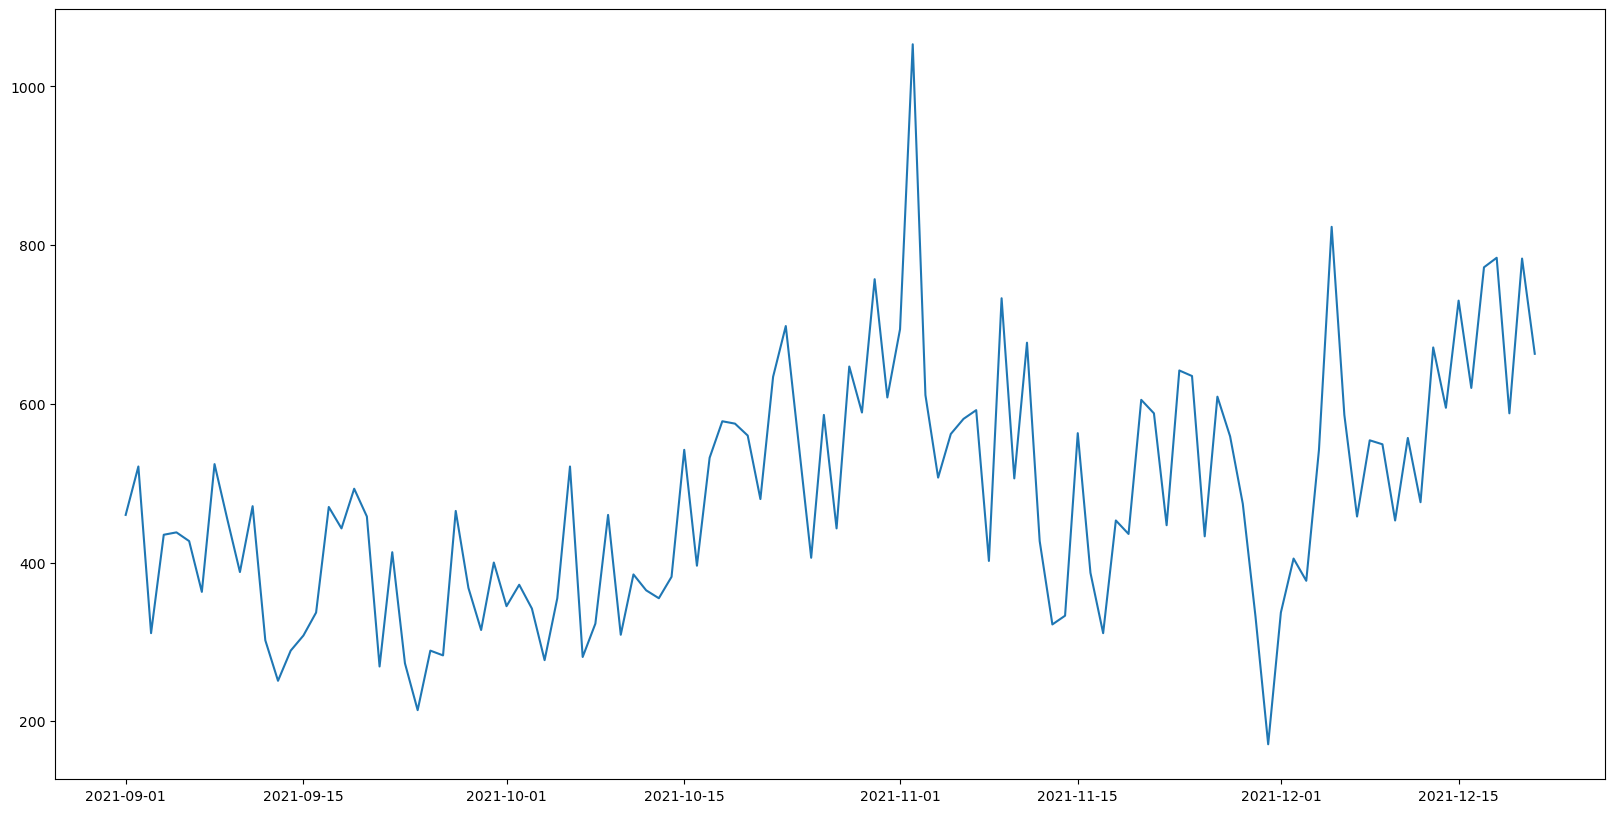

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df.Closure)
plt.show()

<Figure size 2000x1000 with 0 Axes>

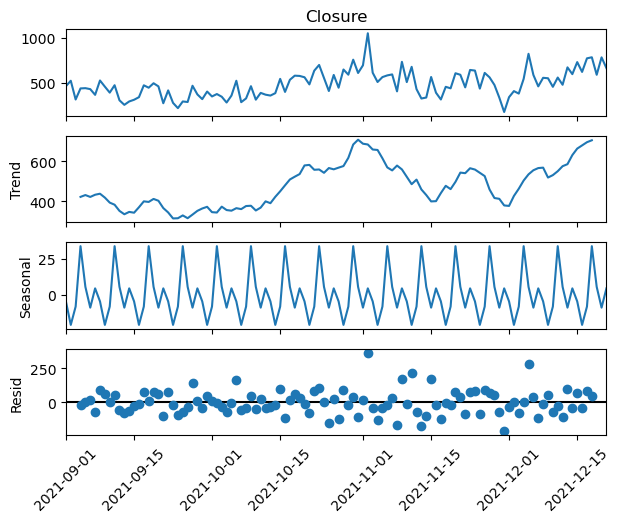

In [12]:
import statsmodels.api as sm
plt.figure(figsize=(20,10))
sm.tsa.seasonal_decompose(df.Closure,model='additive').plot()
plt.xticks(rotation = 45)
plt.show()

In [17]:
#check for stationarity

In [13]:
# Moving average
Ma = df.Closure.rolling(window=7).mean()


In [14]:
Mstd = df.Closure.rolling(window=7).std()


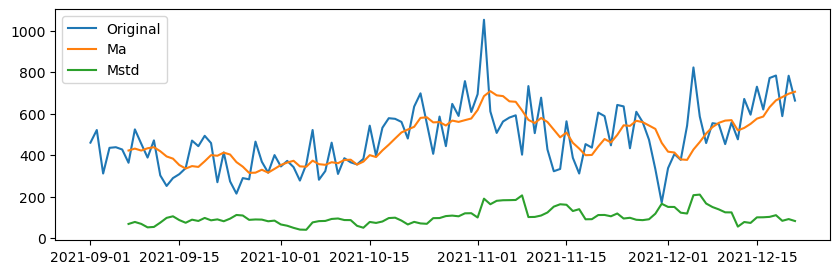

In [15]:
#visually represent of MA and MSTD
plt.figure(figsize=(10,3))
plt.plot(df['Closure'],label='Original')
plt.plot(Ma,label='Ma')
plt.plot(Mstd,label='Mstd')
plt.legend()
plt.show()

In [16]:
#augmented dickey fuller test(ADF test)
from statsmodels.tsa.stattools import adfuller
adf=adfuller(df.Closure)[0:2]
pd.Series(adf,index=['Teststatistic','P-value'])

Teststatistic   -2.594101
P-value          0.094223
dtype: float64

In [16]:
#since p_value >0.05(significance level), that means the data is not stationary

In [17]:
#achieving the stationarity
df_log=np.log(df.Closure)
Ma=df_log.rolling(window=7).mean()
Mstd=df_log.rolling(window=7).std()

In [18]:
df_log_ma=df_log-Ma
df_log_ma.dropna(inplace=True)

In [19]:
adf=adfuller(df_log_ma)
pd.Series(adf[0:2],index=['Teststatistic','p_value'])

Teststatistic   -6.362100e+00
p_value          2.460097e-08
dtype: float64

### SINCE P_VALUE IS LESS THAN 0.05, OUR DATA IS NOW STATIONARY, WE ARE GOOD TO PROCEED FURTHER
Test Statistic (-6.3621): This is the value of the test statistic. Since it's less than the critical values for different confidence levels (such as -3.43 for 1% significance), it indicates that we can reject the null hypothesis that the series has a unit root, which would imply non-stationarity. The negative value suggests strong evidence against the presence of a unit root.

p-value (2.46e-08): The p-value is extremely small, far below common significance thresholds like 0.05 or 0.01. This reinforces the result of the test, which suggests rejecting the null hypothesis of non-stationarity. In other words, the data appears to be stationary.

In [20]:
Ma=df_log_ma.rolling(window=12).mean()
mstd=df_log_ma.rolling(window=12).std()

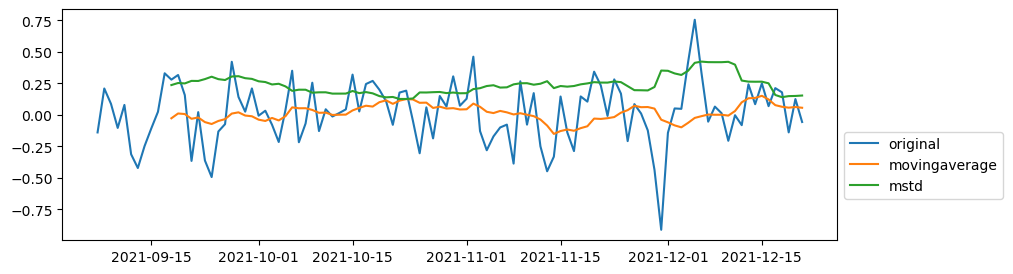

In [21]:
plt.figure(figsize=(10,3))
plt.plot(df_log_ma,label='original')
plt.plot(Ma,label='movingaverage')
plt.plot(mstd,label='mstd')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


In [29]:
#algorithms in timeseries

In [30]:
#AR(autoregressive)
#MA(mOVING AVERAGE)
#ARMA(Autoregressive moving average)
#ARIMA(autoregressive integration moving average)
#SARIMA(simple(autoregressive integration movingaverage)

In [22]:
#Fit the arima model

In [23]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [33]:
#splitting the data

In [24]:
size = int(len(df_log_ma)*0.8)

In [25]:
df_train = df_log_ma.iloc[:size]

In [26]:
df_test = df_log_ma.iloc[size:]

In [27]:
model=ARIMA(df_train,order=(1,0,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Closure   No. Observations:                   84
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  10.292
Date:                Wed, 06 Nov 2024   AIC                            -12.584
Time:                        23:36:29   BIC                             -2.861
Sample:                    09-07-2021   HQIC                            -8.675
                         - 11-29-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.033      0.011      0.991      -0.065       0.066
ar.L1          0.3620      0.439      0.825      0.410      -0.498       1.222
ma.L1         -0.0983      0.466     -0.211      0.833      -1.012       0.815
sigma2         0.0458      0.009      4.898      0.000       0.027       0.064
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.99   Prob(JB):                         0.33
Heteroskedasticity (H):               1.22   Skew:                            -0.11
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
start = size
end = len(df_log_ma) + 15  # Extending 15 days beyond the original data
pred = model_fit.predict(start=start, end=end)

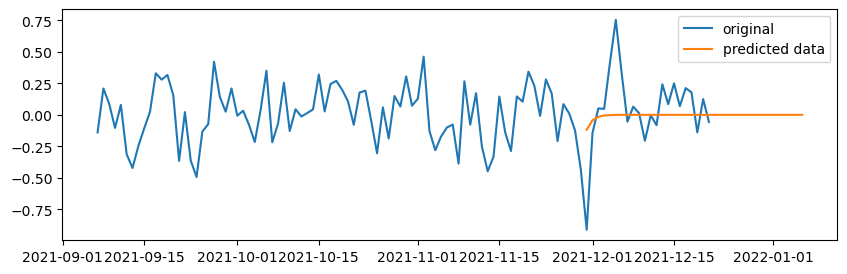

In [29]:
plt.figure(figsize=(10,3))
plt.plot(df_log_ma,label='original')
plt.plot(pred,label='predicted data')
plt.legend()
plt.show()

Key Insights:
ARIMA Model:

While ARIMA is effective for stationary data, it struggled to capture trends and seasonality in your dataset.
The series is stationary, as confirmed by the ADF test results, which makes ARIMA a valid option for forecasting, provided the model is correctly tuned (specifically the p, d, q parameters).
However, ARIMA misses sharp fluctuations and anomalies, such as the sudden spike in December, which could be tied to seasonal effects or external factors (holidays, promotions, etc.).

In the second notebook, I applied the Prophet model to forecast the data. You can review the predictions generated by the Prophet model there. Specifically, I used Prophet to capture the trend and seasonality of the data. If you look at the output in that notebook, you’ll be able to see the forecast for future time points, including the specific forecast for December, which includes both trend and seasonal components.